In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
%reload_kedro

# Load the unannotated data.
clips = catalog.load("tfrecord_unannotated_no_wheel_combined")

2022-06-13 11:09:39,132 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: /home/daniel/git/cotton_flower_mot
2022-06-13 11:09:39,412 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2022-06-13 11:09:39,530 - kedro.io.core - WARNING - `version` attribute removed from data set configuration since it is a reserved word and cannot be directly specified
2022-06-13 11:09:39,531 - kedro.io.core - WARNING - `version` attribute removed from data set configuration since it is a reserved word and cannot be directly specified
2022-06-13 11:09:39,532 - kedro.io.core - WARNING - `version` attribute removed from data set configuration since it is a reserved word and cannot be directly specified
2022-06-13 11:09:39,533 - kedro.io.core - WARNING - `version` attribute removed from data set configuration since it is a reserved word and cannot be directly specified
2022-06-13 11:09:39,578 - kedro.extras.extension

2022-06-13 11:09:39.580 | DEBUG    | cotton_flower_mot.data_sets.tf_records_data_set:_load:47 - Loading TFRecords from /home/daniel/git/cotton_flower_mot/data/05_model_input/unannotated/no_wheel.
2022-06-13 11:09:39.799 | DEBUG    | cotton_flower_mot.data_sets.tf_records_data_set:_load:53 - Loading 3214 TFRecords files from directory.


In [6]:
from cotton_flower_mot.pipelines.dataset_io import colorization_inputs_and_targets_from_dataset
from cotton_flower_mot.pipelines.config import ModelConfig

# Create the preprocessing pipeline.
config = ModelConfig(image_input_shape=(100, 100, 3), frame_input_shape=(1080, 1920, 3), detection_model_input_shape=(540, 960, 3),
                     rot_net_input_shape=(360, 360, 3), colorization_input_shape=(270, 480, 3),
                     colorization_output_shape=(72, 120, 32), num_appearance_features=128, num_gcn_channels=128, sinkhorn_lambda=10.0, num_reduction_stages=2,
                     detection_sigma=3, nominal_detection_size=(0.052, 0.093))
preprocessed = colorization_inputs_and_targets_from_dataset(clips, config=config)

Hue: 0.0029411763 0.418382347
Chroma: 0.0029411763 0.418382347
Hue: 0 0.457107872
Chroma: 0 0.457107872
Hue: 0.0392156839 0.411764741
Chroma: 0.0392156839 0.411764741
Hue: 0.0274509788 0.423774511
Chroma: 0.0274509788 0.423774511
Hue: 0.0235294104 0.419852942
Chroma: 0.0235294104 0.419852942
Hue: 0.0316176452 0.462009817
Chroma: 0.0316176452 0.462009817
Hue: 0.0220588278 0.432598054
Chroma: 0.0220588278 0.432598054
Hue: 0 0.400980413
Chroma: 0 0.400980413


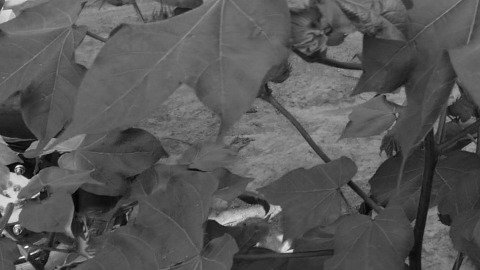

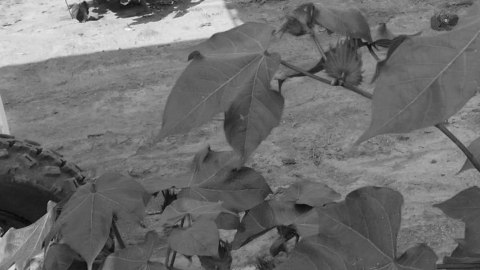

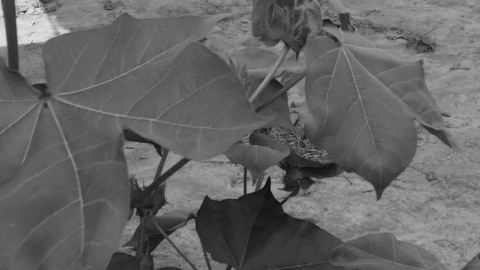

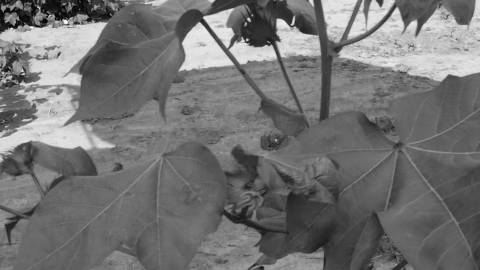

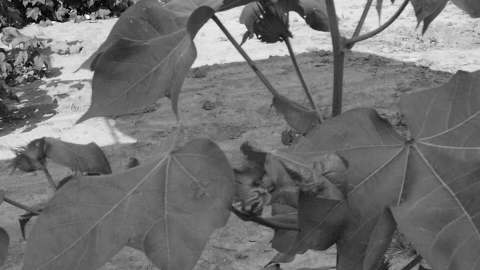

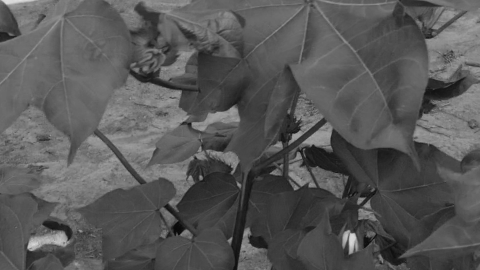

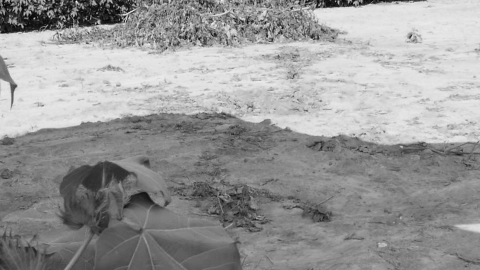

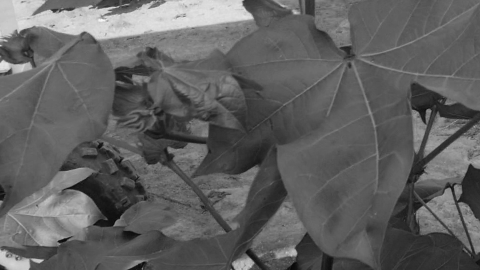

Hue: 0.0122549012 0.37671569
Chroma: 0.0122549012 0.37671569
Hue: 0.0316176452 0.407843143
Chroma: 0.0316176452 0.407843143
Hue: 0.00343137397 0.422303915
Chroma: 0.00343137397 0.422303915
Hue: 0.0389705859 0.399509817
Chroma: 0.0389705859 0.399509817
Hue: 0.0406862721 0.385539263
Chroma: 0.0406862721 0.385539263
Hue: 0.0132352933 0.397058845
Chroma: 0.0132352933 0.397058845
Hue: 0.0183823556 0.372303963
Chroma: 0.0183823556 0.372303963
Hue: 0.0352941155 0.439705878
Chroma: 0.0352941155 0.439705878


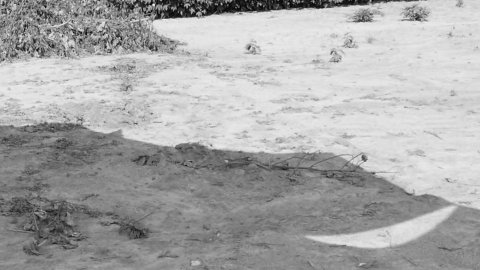

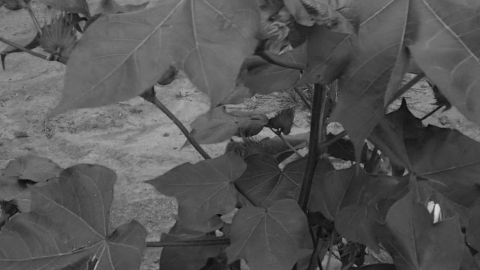

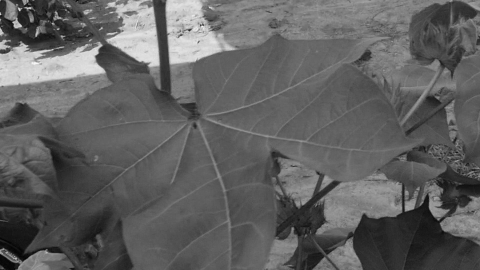

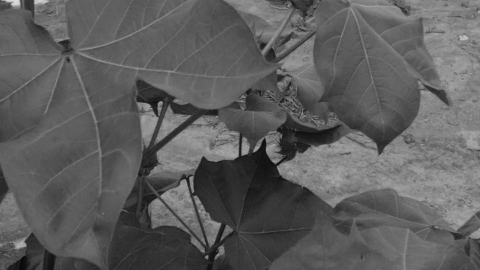

In [3]:
import itertools
from PIL import Image
from IPython.display import display

# Sample the data.
for inputs, targets in itertools.islice(preprocessed.unbatch(), 12):
    # Convert BGR to RGB,
    image = Image.fromarray(inputs["frame"].numpy()[..., 0])
    display(image)

In [4]:
dataset_iter = iter(preprocessed)

In [5]:
next(dataset_iter)

({'frame': <tf.Tensor: shape=(8, 270, 480, 1), dtype=uint8, numpy=
  array([[[[ 98],
           [ 90],
           [103],
           ...,
           [224],
           [209],
           [201]],
  
          [[ 92],
           [ 85],
           [ 99],
           ...,
           [229],
           [216],
           [222]],
  
          [[ 99],
           [ 91],
           [ 87],
           ...,
           [225],
           [229],
           [230]],
  
          ...,
  
          [[111],
           [ 87],
           [ 77],
           ...,
           [ 77],
           [ 74],
           [ 62]],
  
          [[ 94],
           [ 89],
           [ 87],
           ...,
           [ 92],
           [ 77],
           [ 64]],
  
          [[ 71],
           [ 82],
           [101],
           ...,
           [ 73],
           [ 52],
           [ 73]]],
  
  
         [[[190],
           [184],
           [206],
           ...,
           [197],
           [183],
           [190]],
  
          [[191